<a href="https://colab.research.google.com/github/Haqquee/Human_Emotion_Detection/blob/main/Human_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset

In [1]:
!pip install -q kaggle

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

 99% 306M/309M [00:03<00:00, 109MB/s]
100% 309M/309M [00:03<00:00, 106MB/s]


In [5]:
!unzip "/content/human-emotions-datasethes.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/EmotionsDataset/data/nothing/720.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/721.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/722.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/723.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/724.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/725.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/726.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/727.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/728.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/729.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/73.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/730.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/731.jpg  
  inflating: /content/dataset/EmotionsDataset/data/no

# EDA

In [6]:
#Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#Classifciation directories
train_directory = "/content/dataset/Emotions Dataset/Emotions Dataset/train"
valid_directory = "/content/dataset/Emotions Dataset/Emotions Dataset/test"

In [8]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['angry', 'happy', 'sad'],
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
)

Found 6799 files belonging to 3 classes.


In [9]:
valid_data = tf.keras.utils.image_dataset_from_directory(
    valid_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['angry', 'happy', 'sad'],
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
)

Found 2278 files belonging to 3 classes.


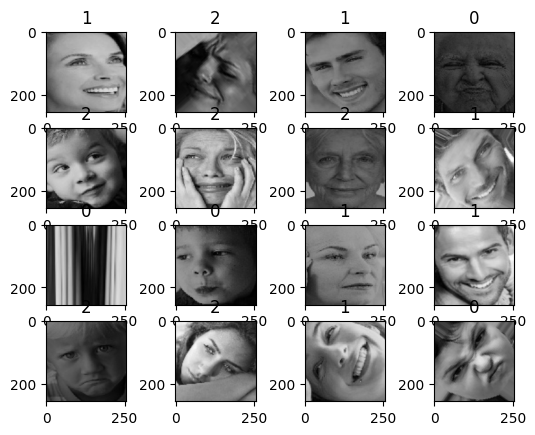

In [10]:
plt.figure()
for image, label in train_data.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(image[i]/255.)
    plt.title(tf.argmax(label[i], axis = 0).numpy())

# Data Preprocessing

In [11]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)
valid_data = valid_data.prefetch(tf.data.AUTOTUNE)

In [12]:
image_size = 256
from keras.layers import Dense, Rescaling, Resizing
Rescale_layer = tf.keras.Sequential([
    Resizing(image_size, image_size),
    Rescaling(1./255),
])

# Model Creation

In [16]:
model_config = {
    "FILTERS" : 6,
    "KERNEL_SIZE" : 3,
    "STRIDES" : 1,
    "BATCH_SIZE" : 32,
    "IMAGE_SIZE" : 256,
    "LEARNING_RATE" : 0.001,
    "EPOCHS" : 25,
    "CLASSES" : 3
}

In [17]:
from keras.layers import InputLayer, Dense, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten
model = tf.keras.Sequential(
    [
    InputLayer(
        input_shape = (model_config["IMAGE_SIZE"],
                       model_config["IMAGE_SIZE"],
                       3)
        ),
    Rescale_layer,
    Conv2D(
        filters = model_config["FILTERS"],
        kernel_size = model_config["KERNEL_SIZE"],
        activation = 'relu',
        #kernel_regularizer= '',
    ),
    BatchNormalization(),
    MaxPool2D(
        pool_size = 2,
        strides = 2,
    ),
    Dropout(
        rate = 0.0,
    ),
    Conv2D(
        filters = model_config["FILTERS"] * 2,
        kernel_size = model_config["KERNEL_SIZE"],
        activation = 'relu'
    ),
    BatchNormalization(),
    MaxPool2D(
        pool_size = 2,
        strides = 2,
    ),
    Flatten(),
    Dense(
        units = 32,
        activation = 'relu',
        ),
    Dense(
          units = 3,
          activation = 'sigmoid',
          ),
    ]
)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 6)       168       
                                                                 
 batch_normalization_2 (Bat  (None, 254, 254, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 6)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 127, 127, 6)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 12)     

# Training the Model

In [19]:
from keras.losses import CategoricalCrossentropy
loss_func = CategoricalCrossentropy(from_logits = False)

In [20]:
from keras.metrics import CategoricalAccuracy
metrics = CategoricalAccuracy(name = "Accuracy")

In [21]:
from keras.optimizers import Adam
model.compile(
    optimizer = Adam(learning_rate = model_config['LEARNING_RATE']),
    loss = loss_func,
    metrics = metrics
)

In [22]:
history = model.fit(
    train_data,
    validation_data = valid_data,
    epochs = model_config["EPOCHS"],
    verbose = 1
)

Epoch 1/25
213/213 [==============================] - 23s 83ms/step - loss: 1.5255 - Accuracy: 0.4796 - val_loss: 11.6438 - val_Accuracy: 0.2261
Epoch 2/25
213/213 [==============================] - 13s 61ms/step - loss: 0.8159 - Accuracy: 0.6258 - val_loss: 7.0230 - val_Accuracy: 0.3705
Epoch 3/25
213/213 [==============================] - 13s 58ms/step - loss: 0.6402 - Accuracy: 0.7135 - val_loss: 1.0951 - val_Accuracy: 0.6185
Epoch 4/25
213/213 [==============================] - 13s 58ms/step - loss: 0.4980 - Accuracy: 0.7675 - val_loss: 0.7763 - val_Accuracy: 0.6664
Epoch 5/25
213/213 [==============================] - 13s 59ms/step - loss: 0.3824 - Accuracy: 0.8203 - val_loss: 0.8251 - val_Accuracy: 0.6883
Epoch 6/25
213/213 [==============================] - 13s 59ms/step - loss: 0.2989 - Accuracy: 0.8514 - val_loss: 1.0076 - val_Accuracy: 0.7028
Epoch 7/25
213/213 [==============================] - 13s 62ms/step - loss: 0.2604 - Accuracy: 0.8738 - val_loss: 0.9261 - val_Accuracy

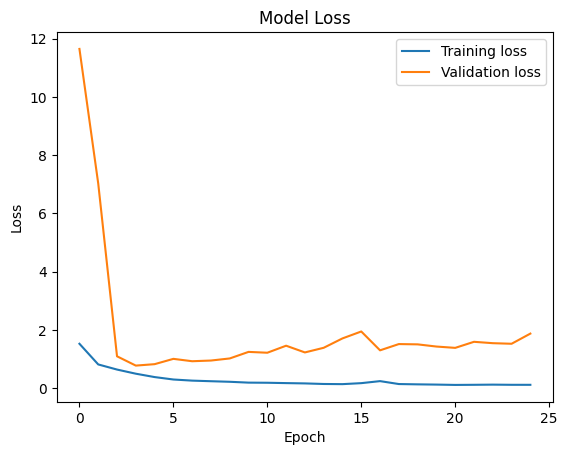

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss','Validation loss'])
plt.show()

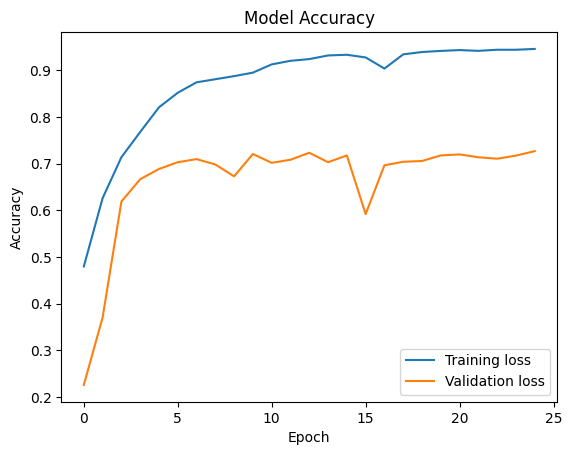

In [24]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

In [25]:
model.evaluate(valid_data)

72/72 [==============================] - 3s 34ms/step - loss: 1.8742 - Accuracy: 0.7265


[1.874194860458374, 0.726514458656311]